# 기초 사용법

opencv tutorial : https://docs.opencv.org/4.6.0/d6/d00/tutorial_py_root.html

In [1]:
import cv2

In [2]:
cv2.__version__

'4.6.0'

## Hello World

※ flags : 컴퓨터에서 무언가를 기억하거나 또는 다른 프로그램에게 약속된 신호를 남기기 위한 용도로 프로그램에 사용되는 미리 정의된 비트 <br>

**imread(파일이름, flags)** : 이미지 읽기
- cv2.IMREAD_COLOR :  RGB 값으로 읽기 (default) 
- cv2.IMREAD_GRAYSCALE : Grayscale 로 읽기
- cv2.IMREAD_UNCHANGED : 파일 속성 그대로 읽기

**namedWindow(윈도우 창 이름, flags)** : 윈도우 이름 설정 
- cv2.WINDOW_NORMAL : 사용자에 의해서 창 크기 조정 가능
- cv2.WINDOW_AUTOSIZE : 이미지와 동일한 크기로 창 크기를 재조정 할 수 없음 (default) 

**imshow(윈도우 창 이름, image (numpy.ndarray))** : 생성된 윈도우 창을 화면에 출력 

[종료조건]<br>
**waitKey(time)** : 키 입력을 기다리는 대기 함수 
- 0 : 무한 대기
- __ms(단위) : 단위의 시간을 입력하면 해당 시간만큼 대기 (1000ms = 1초)

**destroyAllWindows()** : 화면에 나타난 윈도우 종료

In [3]:
img = cv2.imread('./data/lenna.bmp')

print(type(img), img.shape)  # (512, 512, 3) : width, height, channel

cv2.namedWindow("image") 

cv2.imshow("image", img)

cv2.waitKey()           # 어떤 키 입력을 받았을때
cv2.destroyAllWindows() # 윈도우를 종료해라

<class 'numpy.ndarray'> (512, 512, 3)


## 영상 파일 읽고 화면에 표시하기

In [4]:
# Color Mode 로 이미지 읽기
imgColor = cv2.imread('./data/lenna.bmp', cv2.IMREAD_COLOR)

# GrayScale Mode 로 이미지 읽기
imgGray = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

print(type(img), imgColor.shape)
print(type(img), imgGray.shape)

cv2.imshow("image color", imgColor)
cv2.imshow("image gray", imgGray)

cv2.waitKey()
cv2.destroyAllWindows()

<class 'numpy.ndarray'> (512, 512, 3)
<class 'numpy.ndarray'> (512, 512)


## 영상 파일 읽고 저장하기

**imwrite(이미지 저장 경로, 저장할 데이터, [압축률 또는 화질])** : 이미지 저장
- 압축 : [cv2.IMWRITE_PNG_COMPRESSION, 압축률] -> 압축률은 0 ~ 9
- 화질 : [cv2.IMWRITE_JPEG_QUALITY, 화질] -> 0 ~ 100

In [5]:
# Color Mode 로 이미지 읽기
imgColor = cv2.imread('./data/lena.jpg', cv2.IMREAD_COLOR)
print(type(img), imgColor.shape)

cv2.imwrite('./out/lena.bmp', imgColor)
cv2.imwrite('./out/lena.png', imgColor)

cv2.imwrite('./out/lena2.png', imgColor, [cv2.IMWRITE_PNG_COMPRESSION, 9]) # 0~9
cv2.imwrite('./out/lena2.jpg', imgColor, [cv2.IMWRITE_JPEG_QUALITY, 90]) # 0~100

cv2.imshow("image color", imgColor)
cv2.waitKey()
cv2.destroyAllWindows()

<class 'numpy.ndarray'> (512, 512, 3)


## matplotlib으로 컬러 영상 표시

In [6]:
import matplotlib.pyplot as plt

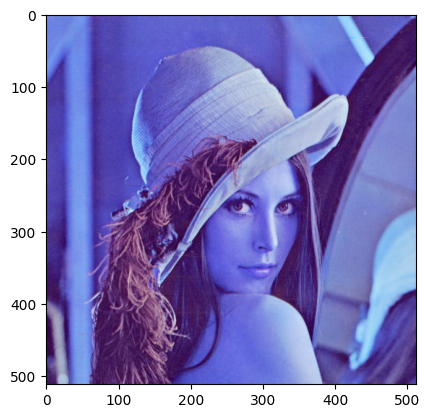

In [7]:
img = cv2.imread('./data/lena.jpg')
plt.imshow(img)

* matplotlib을 표시했을 때 rgb 가 반대로 보이는 현상
* opencv 에서 이미지를 읽을때 bgr(1->3 채널) 순서로 읽기 때문

#### (1) cvtColor 함수를 컬러 채널을 변경후 표시<br>

**cvtColor(src, code[,dst[,dstCn]])** <br>
[code]<br>
현재 컬러 채널 + 2 + 변경 할 컬러 채널 <br>
ex) COLOR_BGR2RGB / COLOR_BGR2GRAY / ...<br>

- BGR : Blue, Green, Red 
- BGRA : Blue, Green, Red, Alpha
- RGB : Red, Green, Blue
- RGNA : Red, Green, Blue, Alpha
- GRAY : gray 단일 채널
- YCrCb : Y, Cr, Cb
- HSV : Hue(색조), Saturation(채도), Value(명도)
- HLS : Hue(색조), Lightness(밝기), Saturation(채도)

※ 색상 공간 코드(참고) : https://076923.github.io/posts/Python-opencv-10/





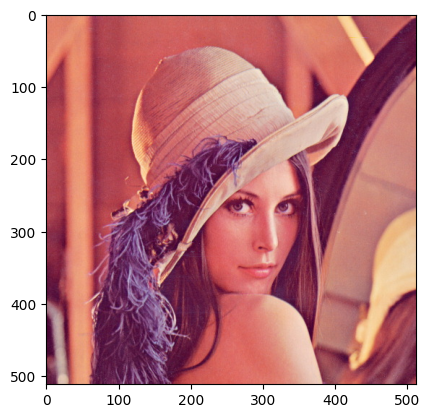

In [8]:
img_bgr = cv2.imread('./data/lena.jpg') # img 에는 BGR 의 순서로 데이터가 준비되어 있음
# BGR -> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

#### (2) numpy ndarray의 색인 문법으로 컬러 채널 순서를 변경

- option 1

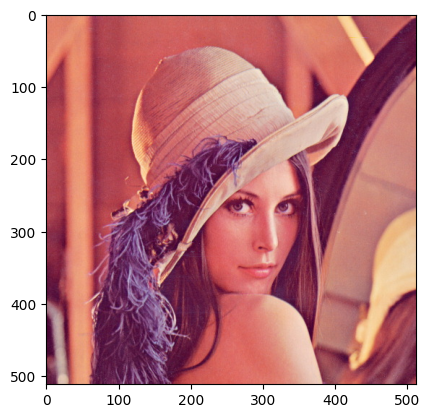

In [9]:
img_bgr = cv2.imread('./data/lena.jpg') # img 에는 BGR 의 순서로 데이터가 준비되어 있음

# BGR -> RGB
img_rgb[:, :, [0, 2]] = img_bgr[:, :, [2, 0]]

plt.imshow(img_rgb)

- option 2

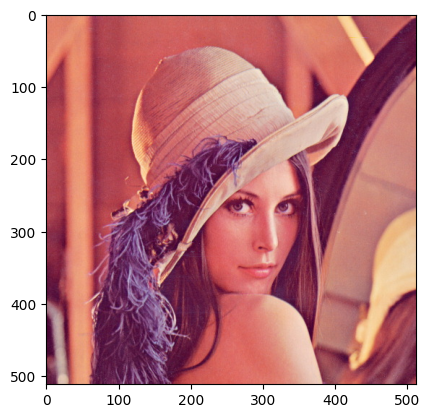

In [10]:
img_bgr = cv2.imread('./data/lena.jpg') # img 에는 BGR 의 순서로 데이터가 준비되어 있음
# BGR -> RGB

img_rgb = img_bgr.copy()
img_rgb[:, :, 0 ] = img_bgr[:, :, 2]
img_rgb[:, :, 2 ] = img_bgr[:, :, 0]

plt.imshow(img_rgb)

- option 3

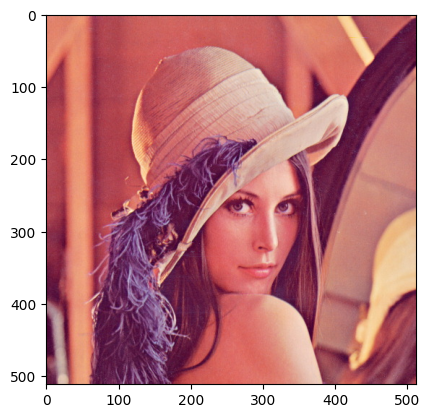

In [12]:
img_bgr = cv2.imread('./data/lena.jpg') # img 에는 BGR 의 순서로 데이터가 준비되어 있음
# BGR -> RGB

img_rgb = img_bgr[:, :, -1::-1]

plt.imshow(img_rgb)

# 동영상 파일 다루기

In [23]:
import sys

- 카메라 디바이스<br>
cap = cv2.VideoCapture(device) <br><br>
- 동영상 파일<br>
cap = cv2.VideoCapture(filepath)   <br><br>
- 스트리밍 주소 <br>
cap = cv2.VideoCapture(url)

## 카메라 디바이스

- ret, frame = cap.read() <br>
  <u>ret</u> (retval = return value) : 잘 읽어왔는지 True, False 값으로 리턴<br>
  <u>frame</u> : 실제 얻어온 데이터 (np.ndarray)<br>

In [14]:
cap = cv2.VideoCapture(0) # 0 : pc 메인 카메라 디바이스가 잡힘 (기본 카메라)

if not cap.isOpened(): # 열기 작업이 수행이 잘 됐나 확인
    print("Camera open failed!")
    sys.exit()
    
while True:
    ret, frame = cap.read() # frame 1장을 얻어옴    
    
    if not ret:
        print('frame read error')
        break
    
    cv2.imshow("frame", frame)
    
    if cv2.waitKey(10) == 27: # cv2.waitKey(10) : 10ms 기다리기, Sleep 효과
        break                 # 27 : ESC Key

if cap.isOpened():
    print("cap released")
    cap.release() # 자원 해제

cv2.destroyAllWindows()
# cv2.waitKey(1)  # MAC에서 window 안닫힐 때
# https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv

cap released


## 동영상 파일

In [38]:
cap = cv2.VideoCapture('./data/stopwatch.avi')

if not cap.isOpened():
    print("Camera open failed!")
    sys.exit()

w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)    
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)    
fps = cap.get(cv2.CAP_PROP_FPS)    
print(w, h, fps)
delay = round(1000/fps)

while True:
    ret, frame = cap.read() # frame 1장을 얻어옴    
    
    if not ret:
        print('frame read error')
        break
    
    cv2.imshow("frame", frame)
    
    if cv2.waitKey(delay) == 27: # cv2.waitKey(10) : 10ms 기다리기, Sleep 효과
        break                    # 27 : ESC Key
            

if cap.isOpened():
    print("cap released")
    cap.release()

cv2.destroyAllWindows()
# cv2.waitKey(1)  # MAC에서 window 안닫힐 때
# https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv

640.0 480.0 30.0
cap released
